In [120]:
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import sys, os
import numpy as np
import glob
import pandas as pd

#Gathering all data in dataframe

seeds = np.linspace(1,10,10,dtype = 'int')
eas = ['uni','gaus']
enemies = [2,5,6]
indp_gains = {}
j=0
for enemy in enemies:
    for ea in eas:
        means=[]
        for seed in seeds:
            folder = 'EA' + ea + '/enemy%i'%enemy
            test = pickle.load(open(folder+ '/exp%i'%seed + '_gains.p',"rb"))

            df = pd.DataFrame(test)
            mean_gain = df['gain'].mean(axis=0)
            means.append(mean_gain)
            
        indp_gains['EA' + ea + '_enemy%i'%enemy] = means

In [121]:
data=pd.DataFrame(indp_gains)

#filtering for each individual boxplot
columns=[]
for en in enemies:
    columns.append("Enemy %i"%en)   
print(columns)

filter_uni = [col for col in data if col.startswith('EAuni')]
data_uni = data[filter_uni]
data_uni.columns = columns

filter_gaus = [col for col in data if col.startswith('EAgaus')]
data_gaus = data[filter_gaus]
data_gaus.columns = columns


columns = ['Uniform', 'Gaussian']
filter_en2 = [col for col in data if col.endswith('2')]
data_en2 = data[filter_en2]
data_en2.columns = columns


filter_en5 = [col for col in data if col.endswith('5')]
data_en5 = data[filter_en5]
data_en5.columns = columns

filter_en6 = [col for col in data if col.endswith('6')]
data_en6 = data[filter_en6]
data_en6.columns = columns

['Enemy 2', 'Enemy 5', 'Enemy 6']


Text(0.5, 1.0, 'All data')

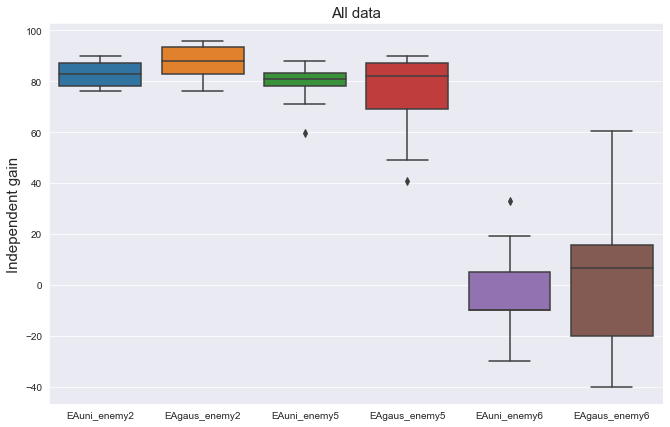

In [145]:
plt.figure(figsize=(11,7))
sns.set_style("darkgrid")


ax=sns.boxplot(x="variable", y="value",data=pd.melt(data))
ax.set_ylabel('Independent gain',fontsize=15)
ax.set_xlabel('')
ax.set_title('All data',fontsize=15)

Text(0.5, 1.0, 'Enemy 2')

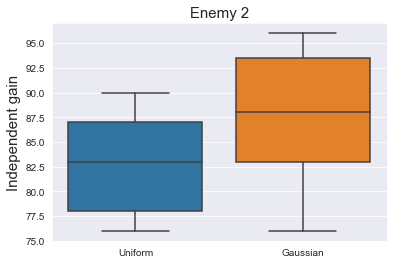

In [146]:
axes = sns.boxplot(x="variable", y="value",data=pd.melt(data_en2))
axes.set_xlabel('')
axes.set_ylabel('Independent gain',fontsize=15)
axes.set_title('Enemy 2',fontsize=15)

Text(0.5, 1.0, 'Enemy 5')

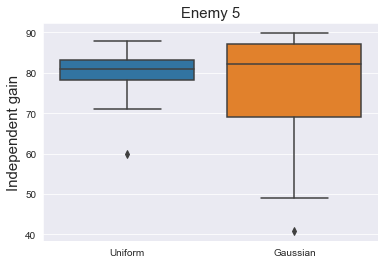

In [147]:
axes = sns.boxplot(x="variable", y="value",data=pd.melt(data_en5))
axes.set_xlabel('')
axes.set_ylabel('Independent gain',fontsize=15)
axes.set_title('Enemy 5',fontsize=15)

Text(0.5, 1.0, 'Enemy 6')

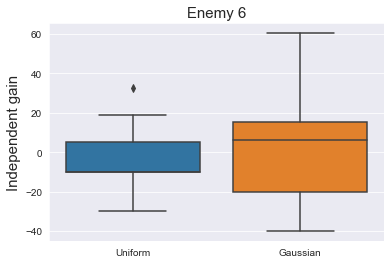

In [148]:
axes = sns.boxplot(x="variable", y="value",data=pd.melt(data_en6))
axes.set_xlabel('')
axes.set_ylabel('Independent gain',fontsize=15)
axes.set_title('Enemy 6',fontsize=15)

Text(0.5, 1.0, 'Uniform mutation')

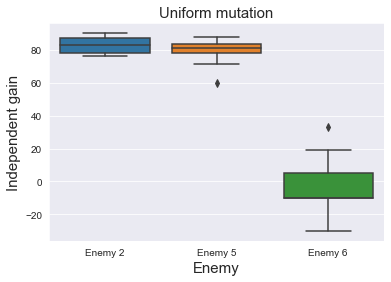

In [149]:
axes = sns.boxplot(x="variable", y="value",data=pd.melt(data_uni))
axes.set_xlabel('Enemy',fontsize=15)
axes.set_ylabel('Independent gain',fontsize=15)
axes.set_title('Uniform mutation',fontsize=15)

Text(0.5, 1.0, 'Gaussian mutation')

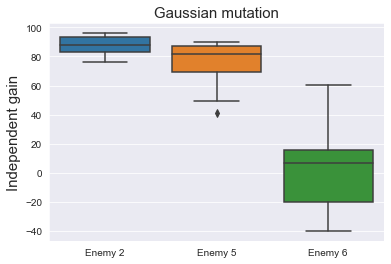

In [150]:
axes = sns.boxplot(x="variable", y="value",data=pd.melt(data_gaus))
axes.set_xlabel('')
axes.set_ylabel('Independent gain',fontsize=15)
axes.set_title('Gaussian mutation',fontsize=15)

## Plotting lineplots

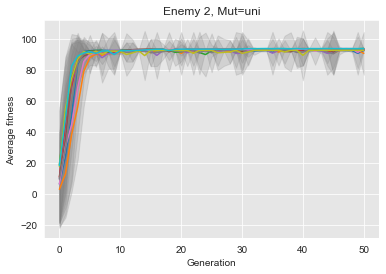

In [142]:
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import sys, os
import numpy as np
import glob

#ACCESS CORRECT FOLDER
ea = 'uni' #ENTER WHICH EA YOU ARE RUNNING ('gaus' or 'uni')
enemy = 2 #ENTER ENEMY

folder = 'EA' + ea + '/enemy%i'%enemy
for n,i in enumerate(glob.glob(folder+'/*[!_gains].p')):
    test = pickle.load(open(i,"rb"))
    gen = np.linspace(0,len(test['avg'])-1,len(test['avg']))
    
    # Plotting stuff
    plt.plot(gen,test['avg'])#,label='exp%i'%(n+1))
    plt.fill_between(gen, test['avg'] - test['std'], test['avg']                       + test['std'],color='gray', alpha=0.2)
    
plt.xlabel('Generation')
plt.ylabel('Average fitness')
#plt.legend()
plt.title('Enemy %i, Mutation=%s'%(enemy, ea))
plt.show()

In [138]:
folder = 'EA' + ea + '/enemy%i'%enemy
for n,i in enumerate(glob.glob(folder+'/*[!_gains].p')):
    print(i)

EAuni/enemy2\exp1.p
EAuni/enemy2\exp10.p
EAuni/enemy2\exp2.p
EAuni/enemy2\exp3.p
EAuni/enemy2\exp4.p
EAuni/enemy2\exp5.p
EAuni/enemy2\exp6.p
EAuni/enemy2\exp7.p
EAuni/enemy2\exp8.p
EAuni/enemy2\exp9.p
